# Assignment 12

## Problem 5.30
An interesting variation of what we saw in the main text is the approach known as gradient descent with momentum:
$$
p^{(k-1)} = \eta\,p^{(k-2)} + \gamma \nabla \phi(x^{(k-1)})\\
x^{(k)} = x^{(k-1)} + p^{(k-1)}
$$
where $\eta$ is a number (which you can take to be constant) from 0 to 1. Implement this
for the same problem as in `descent.py`; feel free to start out with $p^{(0)}$ being the zero
vector. Interpret Eq. (5.153) and discuss why it can help accelerate convergence.

In [ ]:
import numpy as np

def termcrit(xolds,xnews):
  errs = np.abs((xnews - xolds)/xnews)
  return np.sum(errs)

def phi(xs):
  x0, x1 = xs
  return x0**2 - 2*x0 + x1**4 - 2*x1**2 + x1

def gradient(phi,xs,h=1.e-6):
  n = xs.size
  phi0 = phi(xs)
  Xph = (xs*np.ones((n,n))).T + np.identity(n)*h
  grad = (phi(Xph) - phi0)/h
  return grad

def descent(phi,gradient,xolds,gamma=.15,kmax=200,tol=1.e-8):
  for k in range(1,kmax):
    xnews = xolds - gamma*gradient(phi,xolds)
    err = termcrit(xolds,xnews)
    print(k, xnews, err, phi(xnews))
    if err < tol:
      break
    xolds = np.copy(xnews)
  else:
    xnews = None
  return xnews

def descent_with_momentum(phi,gradient,xolds, polds,eta=0.25,gamma=.15,kmax=200,tol=1.e-8):
  for k in range(1,kmax):
    pnews = eta*polds - gamma*gradient(phi,xolds)
    xnews = xolds + pnews
    err = termcrit(xolds,xnews)
    print(k, xnews, err, phi(xnews))
    if err < tol:
      break
    xolds = np.copy(xnews)
    polds = np.copy(pnews)
  else:
    xnews = None
  return xnews

In [ ]:
xolds = np.array([2.,0.25])
xnews = descent(phi, gradient, xolds)
print(xnews)

1 [1.69999985 0.24062524] 0.21543067857184484 -0.38182351336797915
2 [1.48999974 0.22664124] 0.20264073065897387 -0.6333530209502826
3 [1.34299967 0.20564122] 0.21157625945177916 -0.7594983275463574
4 [1.24009962 0.17380848] 0.2661256195506861 -0.8280498618293368
5 [1.16806958 0.12494345] 0.45276305522029103 -0.8777871985954815
6 [1.11764856 0.04873952] 1.608607274900684 -0.9421647380026318
7 [ 1.08235384 -0.07208595] 1.7087398591446958 -1.0756695552415236
8 [ 1.05764754 -0.26511247] 0.7514526354432409 -1.3974185387806914
9 [ 1.04035313 -0.56299971] 0.5457308766418241 -2.0948395460096236
10 [ 1.02824704 -0.94372756] 0.41520335042339795 -2.9309660540915905
11 [ 1.01977278 -1.15566205] 0.19169789499758141 -3.0426740826911614
12 [ 1.01384079 -1.0729902 ] 0.08289908836262229 -3.0499045321707055
13 [ 1.00968841 -1.12557975] 0.05083473301209256 -3.054234380060766
14 [ 1.00678173 -1.09531014] 0.03052274820652257 -3.05538233943229
15 [ 1.00474706 -1.11406803] 0.018862352410894102 -3.0558933421

In [ ]:
xolds = np.array([2.,0.25])
polds = np.array([0., 0.])
xnews = descent_with_momentum(phi, gradient, xolds, polds, eta=0.2)
print(xnews)

1 [1.69999985 0.24062524] 0.21543067857184484 -0.38182351336797915
2 [1.42999971 0.22476629] 0.25936883745689276 -0.6888214662376545
3 [1.24699962 0.19964143] 0.2726022562965592 -0.8174746002203299
4 [1.13629957 0.15962735] 0.34809335729424173 -0.87210758251611
5 [1.07326954 0.09496076] 0.7397094211881284 -0.917624592080974
6 [ 1.03868252 -0.0115096 ] 9.283867028949459 -1.0102781893769623
7 [ 1.02016021 -0.18970822] 0.9574862508909577 -1.2599849821566138
8 [ 1.01040754 -0.48507614] 0.6185626452517387 -1.900199993629774
9 [ 1.00533459 -0.9167126 ] 0.4758985718355061 -2.891199851749502
10 [ 1.00271947 -1.24084565] 0.2638274994185476 -2.949564396171641
11 [ 1.00138046 -1.05386425] 0.17876173526829758 -3.041623377358868
12 [ 1.00069837 -1.09651536] 0.03957857220578065 -3.0555709948045777
13 [ 1.00035229 -1.12192111] 0.02299082122645062 -3.0549916859041666
14 [ 1.00017724 -1.1028538 ] 0.01746408384804445 -3.0560739167820037
15 [ 1.00008891 -1.1059217 ] 0.002862384828441496 -3.05616467638782

**Solution:** By trial and error, we have found that for $\eta \approx 0.2$, gradient descent with momentum method takes 32 iterations to converge as opposed to the original method which takes 50.

The momentum term in gradient descent can be thought of as the moving average of the gradients. The larger the momentum the more resistant it is to changes in the gradients. Every iteration, a fraction of the last iteration is added to the current one and hence the algorithm converges faster towards the minimum value.

The concept is analogous to classical momentum in physics. For example, if a ball that is rolling down a hill has enough momentum, it can roll over plateau region and make it to a global minima instead of getting stuck at a local minima.

## Problem 3.2.17 (Kiusalaas Numerical Methods)

Linear regression can be extended to data that depend on two or more variables
(called multiple linear regression). If the dependent variable is $z$ and independent variables are $x$ and $y$, the data to be fitted have the form

<center>

| $x_1$ | $y_1$ | $z_1$ |
|:---:|:---:|:---:|
| $x_2$ | $y_2$ | $z_2$ |
| $\vdots$ | $\vdots$ | $\vdots$ |
| $x_n$ | $y_n$ | $z_n$ |

</center>

Instead of a straight line, the fitting function now represents a plane:
$$f(x,y)=a+bx+cy$$

Show that the normal equations for the coefficients are
$$
\begin{bmatrix}
n & \sum x_i & \sum y_i\\
\sum x_i & \sum x_i^2 & \sum x_iy_i\\
\sum y_i & \sum x_iy_i & \sum y_i^2\\
\end{bmatrix}\begin{bmatrix}
a \\
b \\
c
\end{bmatrix}=\begin{bmatrix}
\sum z_i \\
\sum x_iz_i \\
\sum y_iz_i
\end{bmatrix}
$$

**Solution:** For $f(x,y) = a+bx+cy$, let

$$\chi(a,b,c)=\sum_{i=1}^{n}\left[z_i-f(x_i,y_i)\right]^2\\
=\sum_{i=1}^{n}(z_i-a-bx_i-cy_i)^2
$$

Partially differentiting $\chi$ wrt $a$, $b$ and $c$ and setting them to zero to minimize $\chi$,

$$
\frac{\partial \chi}{\partial a} = \sum_{i=1}^{n} -2(z_i-a-bx_i-cy_i)=0\\\implies \boxed{an+b\sum_{i=1}^{n}x_i+c\sum_{i=1}^{n}y_i=\sum_{i=1}^{n}z_i}
$$

wrt $b$,

$$
\frac{\partial \chi}{\partial b} = \sum_{i=1}^{n} -2(z_i-a-bx_i-cy_i)x_i=0\\\implies \boxed{a\sum_{i=1}^{n}x_i+b\sum_{i=1}^{n}x_i^2+c\sum_{i=1}^{n}x_iy_i=\sum_{i=1}^{n}z_ix_i}
$$

wrt $c$,

$$
\frac{\partial \chi}{\partial c} = \sum_{i=1}^{n} -2(z_i-a-bx_i-cy_i)y_i=0\\\implies \boxed{a\sum_{i=1}^{n}y_i+b\sum_{i=1}^{n}x_iy_i+c\sum_{i=1}^{n}y_i^2=\sum_{i=1}^{n}z_iy_i}
$$

The three boxed equations can be expressed in matrix format as the product of the given matrix and the column matrix $\begin{pmatrix}a&b&c\end{pmatrix}^T$,

$$
\begin{bmatrix}
n & \sum x_i & \sum y_i\\
\sum x_i & \sum x_i^2 & \sum x_iy_i\\
\sum y_i & \sum x_iy_i & \sum y_i^2\\
\end{bmatrix}\begin{bmatrix}
a \\
b \\
c
\end{bmatrix}=\begin{bmatrix}
\sum z_i \\
\sum x_iz_i \\
\sum y_iz_i
\end{bmatrix}
$$

Hence, proved.

## Problem 3.2.18

Use multiple linear regression explained in Prob. 17 to determine the function

$$f(x,y)=a+bx+cy$$

that fits the following data
<center>

| x | y | z |
|:---:|:---:|:---:|
| 0 | 0 | 1.42 |
| 0 | 1 | 1.85 |
| 1 | 0 | 0.78 |
| 2 | 0 | 0.18 |
| 2 | 1 | 0.60 |
| 2 | 2 | 1.05 |

</center>

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def multiple_linear_reg(xs, ys, zs):
  n = len(xs)
  M = np.zeros((3, 3))
  I = np.zeros(n) + 1
  Zs = np.zeros(3)

  vars = (I, xs, ys)
  for i in range(3):
    for j in range(3):
      if i <= j:
        M[i,j] = M[j,i] = vars[i]@vars[j]
    Zs[i] = vars[i]@zs

  sol = np.linalg.solve(M, Zs) # using gaussian elimination
  return sol

def stddev(xs, ys, zs, soln):
  a, b, c = soln
  n = len(xs)
  chi = np.sum((zs - (a+b*xs+c*ys))**2)
  sigma = np.sqrt(chi/(n-3-1))
  return sigma

xData = np.array([0,0,1,2,2,2])
yData = np.array([0,1,0,0,1,2])
zData = np.array([1.42, 1.85, 0.78, 0.18, 0.60, 1.05])
a,b,c = multiple_linear_reg(xData, yData, zData)
print(f'Best fit parameters for f(x, y) = a+bx+cy:\na = {a}\nb = {b}\nc = {c}')
print(f'With standard deviation: {stddev(xData, yData, zData, (a,b,c))}')

Best fit parameters for f(x, y) = a+bx+cy:
a = 1.4132558139534876
b = -0.6213953488372093
c = 0.43755813953488415
With standard deviation: 0.013446707905222436


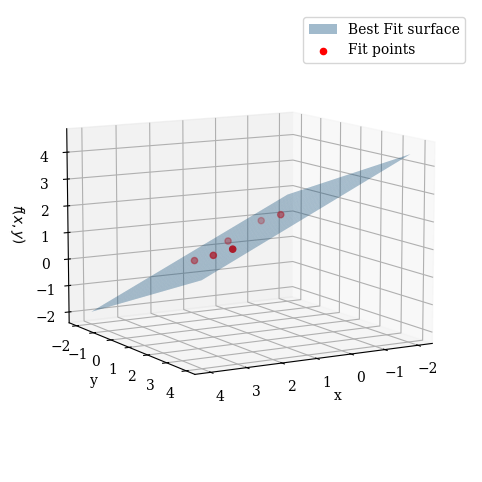

In [9]:
plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["font.family"] = "serif"

x = np.linspace(-2, 4, 100)
y = np.linspace(-2, 4, 100)

x, y = np.meshgrid(x, y)
z = b * x + c * y + a

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.plot_surface(x, y, z, alpha=0.4, label='Best Fit surface')
ax.scatter(xData , yData , zData,  color='red', label='Fit points')
ax.view_init(10, 60)
plt.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('$f(x,y)$')
ax.set_box_aspect(aspect=None, zoom=0.9)
plt.show()